In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# EDA

## 1. Summary Statistics

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')

In [4]:
#Display the first 5 rows of the dataset
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [5]:
#Display the last 5 rows of the dataset
df.tail()

Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[5 rows x 22 columns]

In [6]:
#Display the number of Variables and Observations
df.shape

(2938, 22)

In [7]:
#Display the datatypes of the Variables
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [8]:
#Count the number of non-missing values for each Variable
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

## 2. Removing Null values

In [9]:
#Check for Null values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
# Identify percentage of null values in each column.
round(df.isnull().sum()*100/df.isnull().count())


Country                             0.0
Year                                0.0
Status                              0.0
Life expectancy                     0.0
Adult Mortality                     0.0
infant deaths                       0.0
Alcohol                             7.0
percentage expenditure              0.0
Hepatitis B                        19.0
Measles                             0.0
 BMI                                1.0
under-five deaths                   0.0
Polio                               1.0
Total expenditure                   8.0
Diphtheria                          1.0
 HIV/AIDS                           0.0
GDP                                15.0
Population                         22.0
 thinness  1-19 years               1.0
 thinness 5-9 years                 1.0
Income composition of resources     6.0
Schooling                           6.0
dtype: float64

It is clear that from the above analysis, "Hepatitis B",
"GDP","Population" has significant null values ( 15% and above)

In [11]:
#Replacing null values by the mean value
updated_df = df
updated_df['GDP']=updated_df['GDP'].fillna(updated_df['GDP'].mean())
updated_df['Hepatitis B']=updated_df['Hepatitis B'].fillna(updated_df['Hepatitis B'].mean())
updated_df['Population']=updated_df['Population'].fillna(updated_df['Population'].mean())


In [12]:
# Identify percentage of null values in each column for the Updated DF.
round(updated_df.isnull().sum()*100/updated_df.isnull().count())


Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            7.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               1.0
under-five deaths                  0.0
Polio                              1.0
Total expenditure                  8.0
Diphtheria                         1.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              1.0
 thinness 5-9 years                1.0
Income composition of resources    6.0
Schooling                          6.0
dtype: float64

## 3. Handling Duplicates 

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

In [14]:
df.drop_duplicates()

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [15]:
'''
Hence there has no variable that defines a unique value such as 
an user Id, etc, we will not be having the need to remove
any duplicate values
'''

'\nHence there has no variable that defines a unique value such as \nan user Id, etc, we will not be having the need to remove\nany duplicate values\n'

## 4. Descriptive Statistics

In [16]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    80.940461       0.000000   
50%       3.755000               64.912906    87.000000      17.000000   
75%       7.702500              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   13136.800417  5.381546e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    3116.561755  3.675929e+06   
75%      97.000000     0.800000    7483.158469  1.275338e+07   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [17]:
#Including categorical Variables
df.describe(include='all')

Country         Year      Status  Life expectancy   \
count          2938  2938.000000        2938       2928.000000   
unique          193          NaN           2               NaN   
top     Saint Lucia          NaN  Developing               NaN   
freq             16          NaN        2426               NaN   
mean            NaN  2007.518720         NaN         69.224932   
std             NaN     4.613841         NaN          9.523867   
min             NaN  2000.000000         NaN         36.300000   
25%             NaN  2004.000000         NaN         63.100000   
50%             NaN  2008.000000         NaN         72.100000   
75%             NaN  2012.000000         NaN         75.700000   
max             NaN  2015.000000         NaN         89.000000   

        Adult Mortality  infant deaths      Alcohol  percentage expenditure  \
count       2928.000000    2938.000000  2744.000000             2938.000000   
unique              NaN            NaN          NaN                     NaN   
top                 NaN            NaN          NaN                     NaN   
freq                NaN            NaN          NaN                     NaN   
mean         164.796448      30.303948     4.602861              738.251295   
std          124.292079     117.926501     4.052413             1987.914858   
min            1.000000       0.000000     0.010000                0.000000   
25%           74.000000       0.000000     0.877500                4.685343   
50%          144.000000       3.000000     3.755000               64.912906   
75%          228.000000      22.000000     7.702500              441.534144   
max          723.000000    1800.000000    17.870000            19479.911610   

        Hepatitis B       Measles   ...        Polio  Total expenditure  \
count   2938.000000    2938.000000  ...  2919.000000         2712.00000   
unique          NaN            NaN  ...          NaN                NaN   
top             NaN            NaN  ...          NaN                NaN   
freq            NaN            NaN  ...          NaN                NaN   
mean      80.940461    2419.592240  ...    82.550188            5.93819   
std       22.586855   11467.272489  ...    23.428046            2.49832   
min        1.000000       0.000000  ...     3.000000            0.37000   
25%       80.940461       0.000000  ...    78.000000            4.26000   
50%       87.000000      17.000000  ...    93.000000            5.75500   
75%       96.000000     360.250000  ...    97.000000            7.49250   
max       99.000000  212183.000000  ...    99.000000           17.60000   

        Diphtheria      HIV/AIDS            GDP    Population  \
count   2919.000000  2938.000000    2938.000000  2.938000e+03   
unique          NaN          NaN            NaN           NaN   
top             NaN          NaN            NaN           NaN   
freq            NaN          NaN            NaN           NaN   
mean      82.324084     1.742103    7483.158469  1.275338e+07   
std       23.716912     5.077785   13136.800417  5.381546e+07   
min        2.000000     0.100000       1.681350  3.400000e+01   
25%       78.000000     0.100000     580.486996  4.189172e+05   
50%       93.000000     0.100000    3116.561755  3.675929e+06   
75%       97.000000     0.800000    7483.158469  1.275338e+07   
max       99.000000    50.600000  119172.741800  1.293859e+09   

         thinness  1-19 years   thinness 5-9 years  \
count             2904.000000          2904.000000   
unique                    NaN                  NaN   
top                       NaN                  NaN   
freq                      NaN                  NaN   
mean                 4.839704             4.870317   
std                  4.420195             4.508882   
min                  0.100000             0.100000   
25%                  1.600000             1.500000   
50%                  3.300000             3.300000   
75%                  7.200000             7.2000

In [18]:
#Displaying complete Meta-Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## 5. Data Distribution

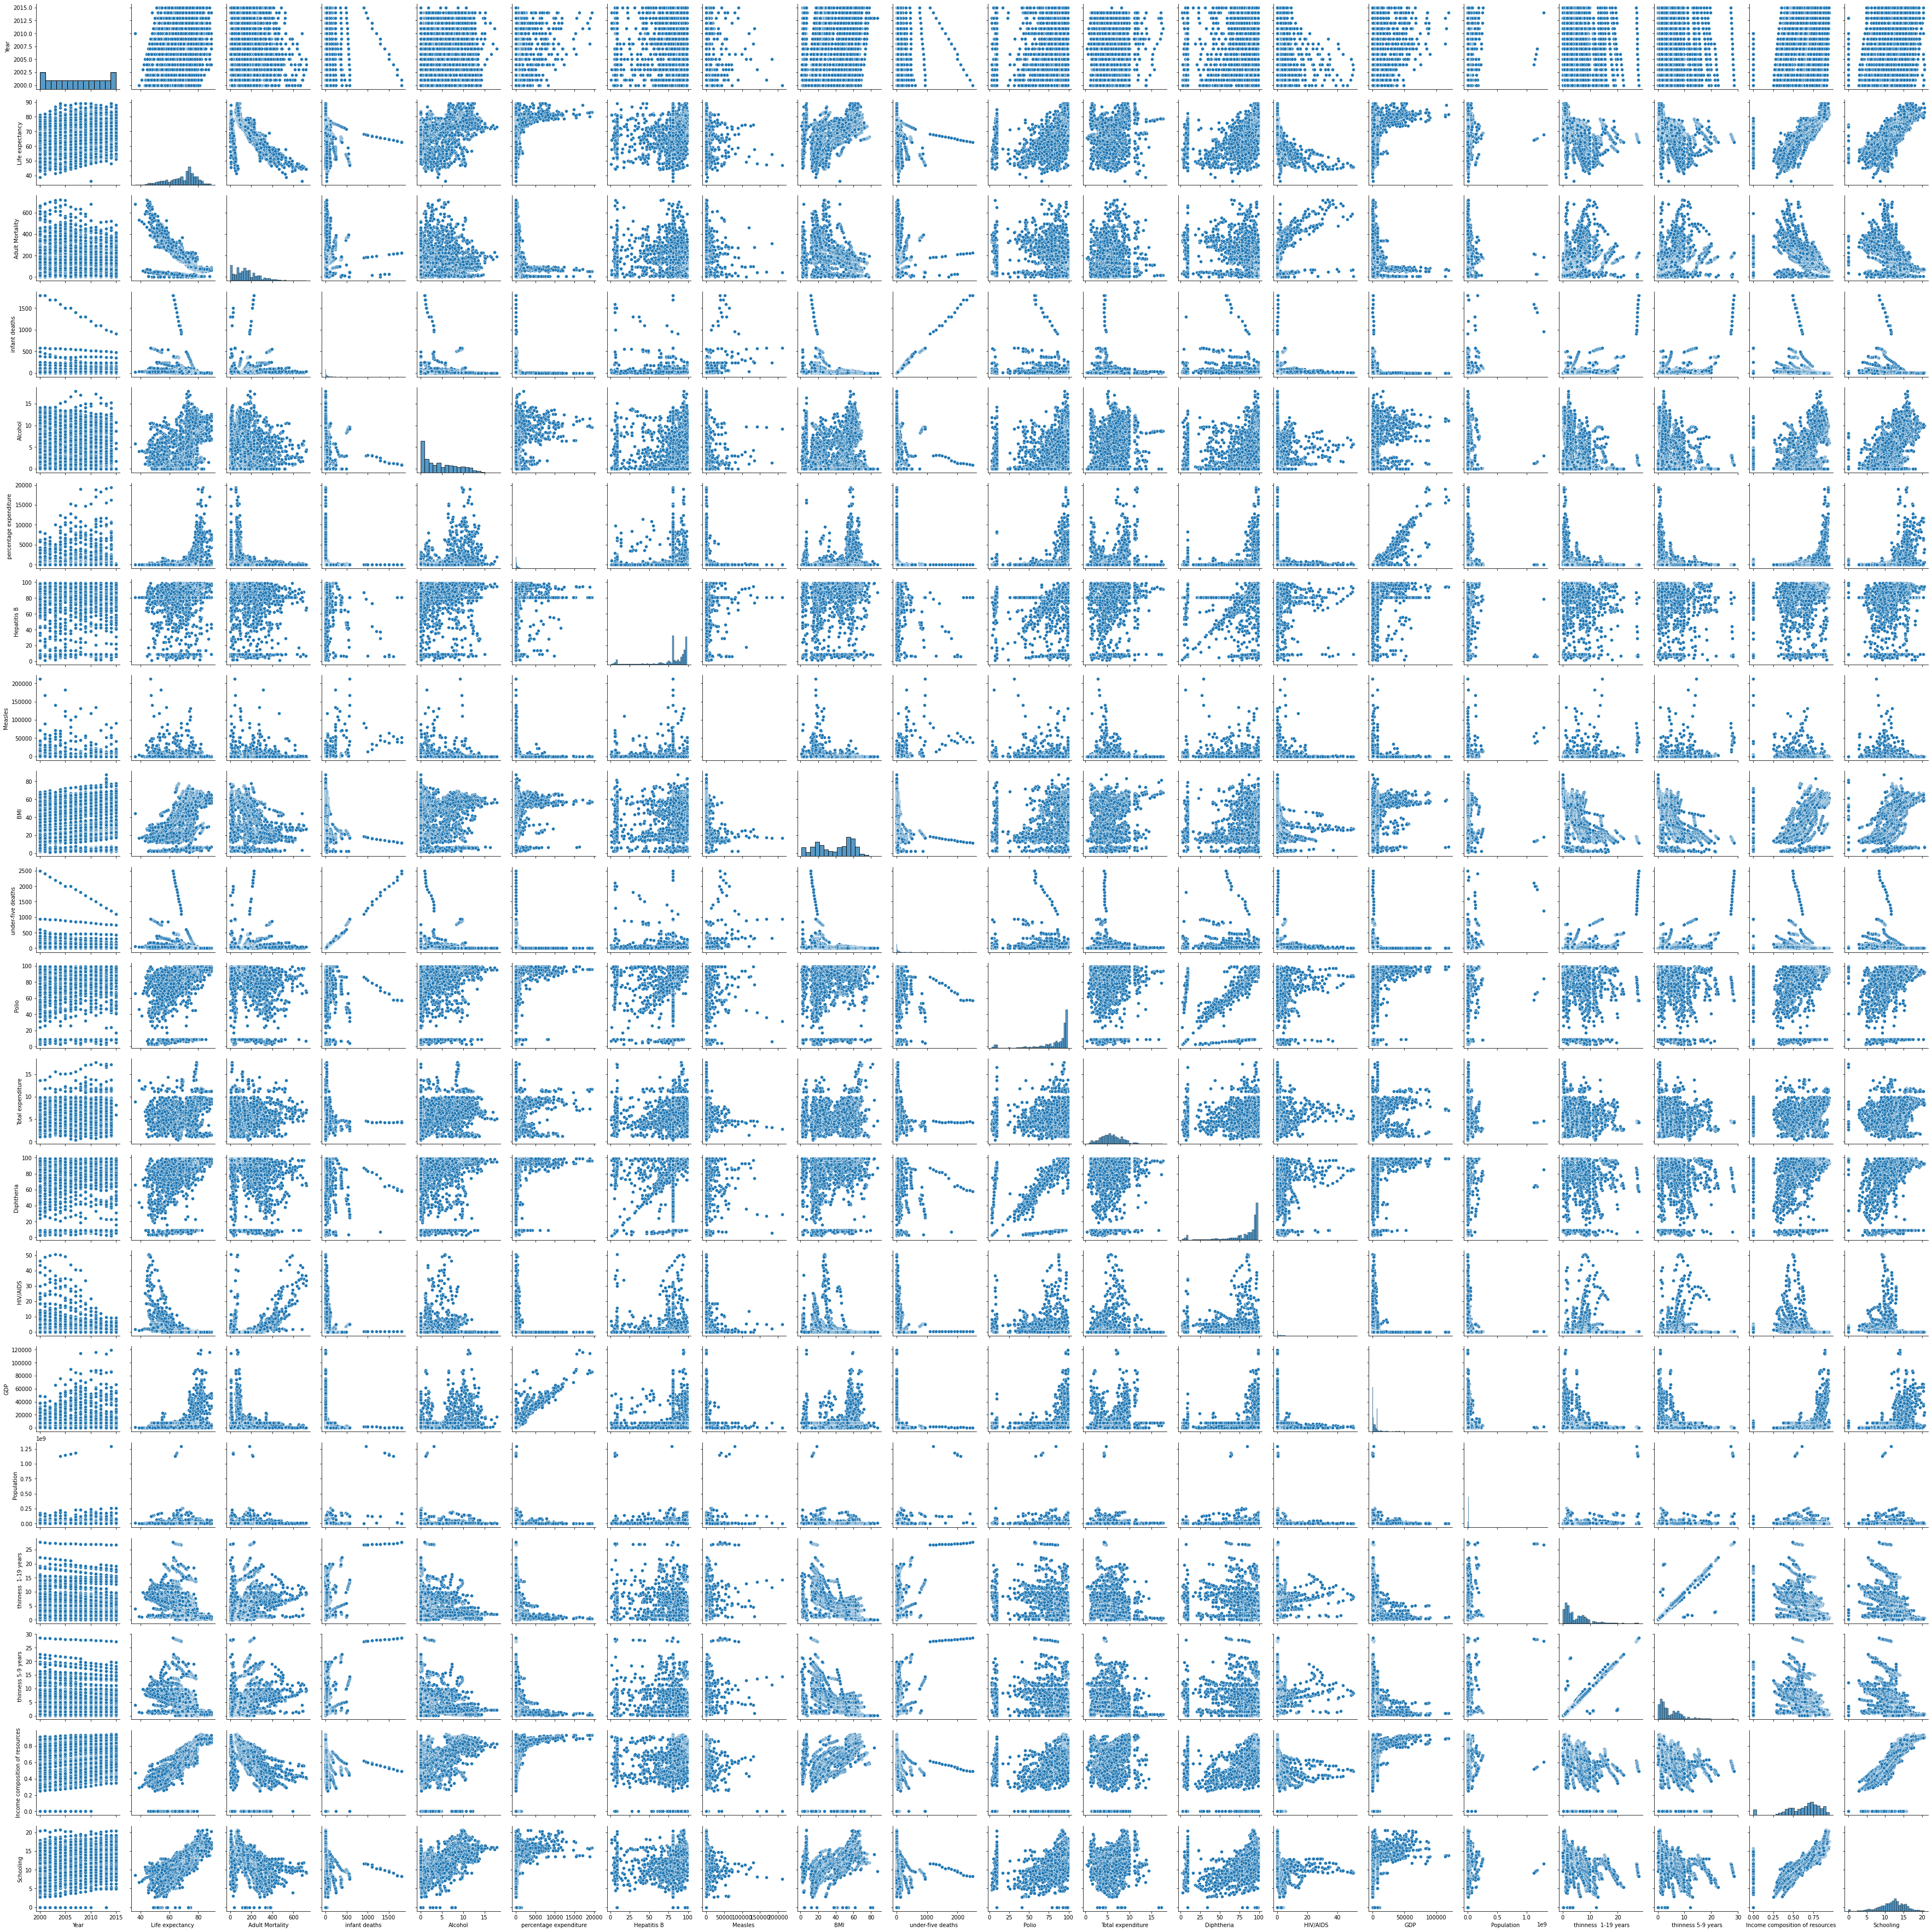

In [20]:
sns.pairplot(updated_df)

<AxesSubplot:xlabel='Population', ylabel='Count'>

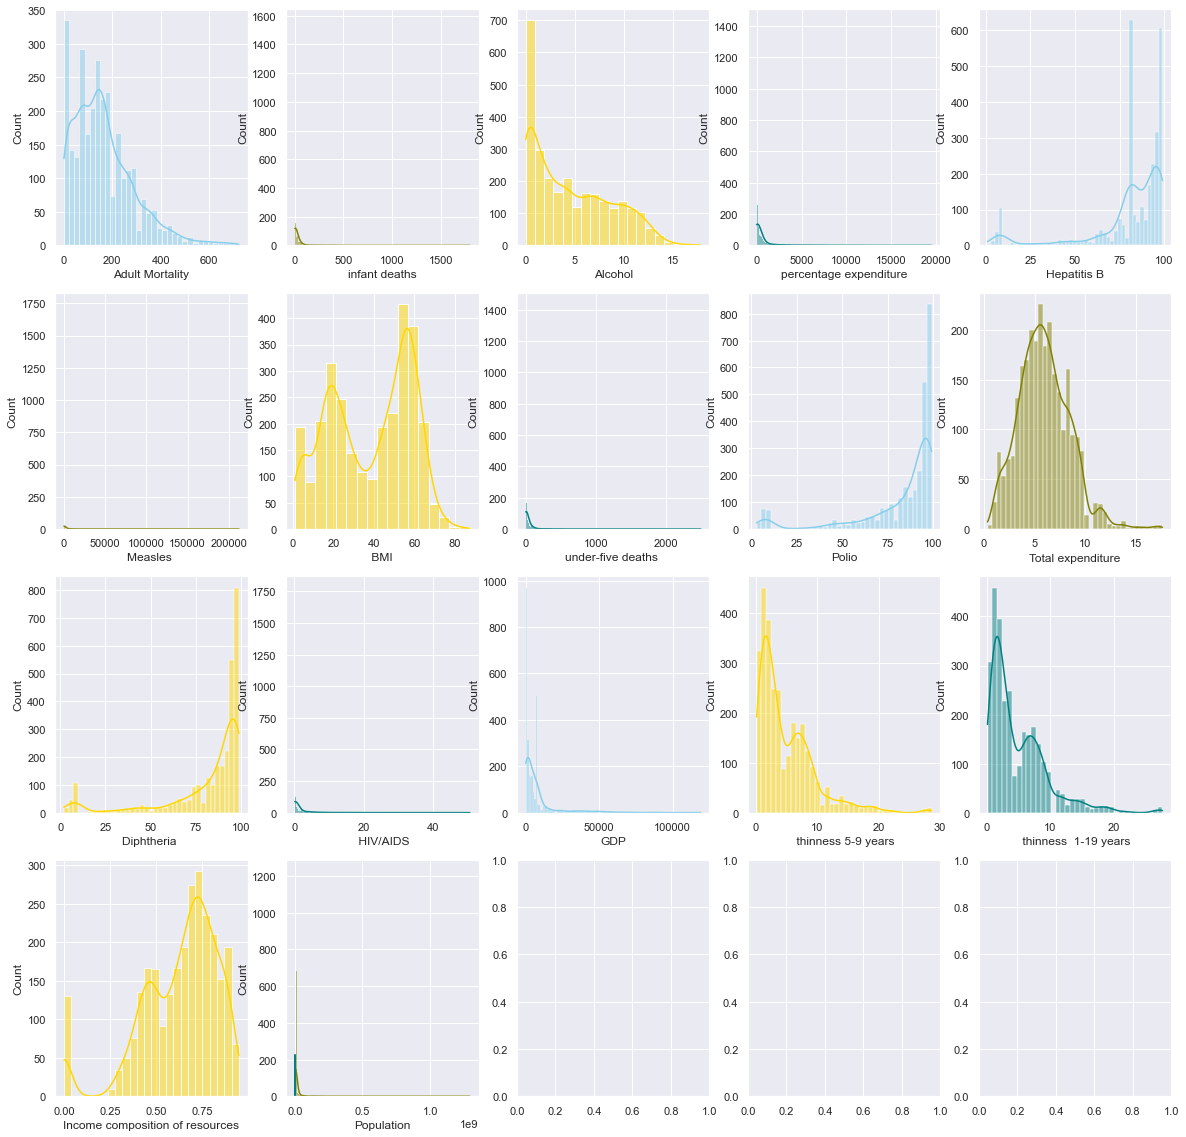

In [53]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 5, figsize=(20, 20))

sns.histplot(data=updated_df, x="Adult Mortality", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=updated_df, x="infant deaths", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=updated_df, x="Alcohol", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=updated_df, x="percentage expenditure", kde=True, color="teal", ax=axs[0, 3])
sns.histplot(data=updated_df, x="Hepatitis B", kde=True, color="skyblue", ax=axs[0, 4])

sns.histplot(data=updated_df, x="Measles ", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=updated_df, x=" BMI ", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=updated_df, x="under-five deaths ", kde=True, color="teal", ax=axs[1, 2])
sns.histplot(data=updated_df, x="Polio", kde=True, color="skyblue", ax=axs[1, 3])
sns.histplot(data=updated_df, x="Total expenditure", kde=True, color="olive", ax=axs[1, 4])

sns.histplot(data=updated_df, x="Diphtheria ", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=updated_df, x=" HIV/AIDS", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=updated_df, x="GDP", kde=True, color="skyblue", ax=axs[2, 2])
sns.histplot(data=updated_df, x="Population", kde=True, color="olive", ax=axs[3, 1])
sns.histplot(data=updated_df, x=" thinness 5-9 years", kde=True, color="gold", ax=axs[2, 3])
sns.histplot(data=updated_df, x=" thinness  1-19 years", kde=True, color="teal", ax=axs[2, 4])

sns.histplot(data=updated_df, x="Income composition of resources", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=updated_df, x="Schooling", kde=True, color="teal", ax=axs[3, 1])

## 6. Correlation 

Let's check if we can find a correlated variable to predict the null values of the selected above 3 variables

<AxesSubplot:>

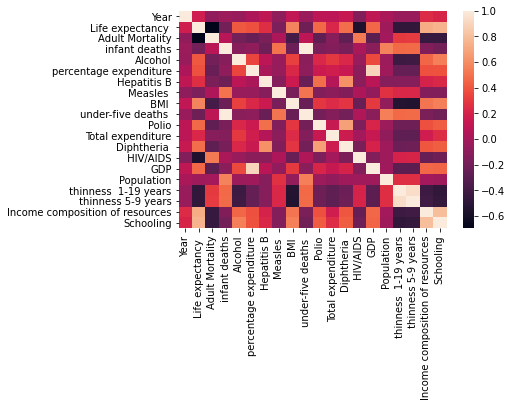

In [49]:
# plot the heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [54]:
#It is visivle that there is a correlation between GDP and Percentage expenditure hence we can try creating model
#between those two in the latter part of the project

# 7. Normalization 

In [75]:
normalized_df=(updated_df-updated_df.mean())/updated_df.std()

# Fitting the Model

In [76]:
normalized_df.drop(["Country", "Status"], axis=1, inplace=True)

In [77]:
column_to_move = normalized_df.pop("Life expectancy ")

# insert column with insert(location, column_name, column_value)

normalized_df.insert(19, "Life expectancy", column_to_move)

In [78]:
normalized_df.head()

BMI    HIV/AIDS   thinness  1-19 years   thinness 5-9 years  \
0 -0.958951   -0.32339               2.796324             2.756711   
1 -0.983896   -0.32339               2.864194             2.801068   
2 -1.008841   -0.32339               2.909441             2.845424   
3 -1.033786   -0.32339               2.954688             2.911960   
4 -1.053742   -0.32339               3.022558             2.956317   

   Adult Mortality   Alcohol  Diphtheria        GDP  Hepatitis B  \
0         0.790103 -1.133365    -0.730453 -0.525158    -0.705741   
1         0.854468 -1.133365    -0.856945 -0.522994    -0.838561   
2         0.830331 -1.133365    -0.772617 -0.521544    -0.750014   
3         0.862513 -1.133365    -0.646125 -0.518635    -0.617194   
4         0.886650 -1.133365    -0.603961 -0.564797    -0.572920   

   Income composition of resources  Measles      Polio  Population  Schooling  \
0                        -0.704355 -0.110366 -3.267459    0.389909  -0.563512   
1                        -0.718580 -0.168095 -1.047897   -0.230896  -0.593284   
2                        -0.747029 -0.173502 -0.877162    0.352655  -0.623055   
3                        -0.780219  0.032040 -0.663742   -0.168287  -0.652827   
4                        -0.822893  0.051748 -0.621059   -0.181635  -0.742141   

   Total expenditure      Year  infant deaths  percentage expenditure  \
0           0.889322  1.621486       0.268778               -0.335513   
1           0.897327  1.404747       0.285738               -0.334384   
2           0.877314  1.188008       0.302697               -0.334537   
3           1.033419  0.971269       0.328137               -0.332040   
4           0.773244  0.754530       0.345097               -0.367800   

   under-five deaths   Life expectancy  
0            0.255316        -0.443615  
1            0.274014        -0.979112  
2            0.292712        -0.979112  
3            0.317642        -1.021112  
4            0.342573        -1.052611

In [84]:
normalized_df = normalized_df.dropna()
X = normalized_df.iloc[:, [0,17]].values   
y = normalized_df.iloc[:, [18]].values   

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [93]:
model.predict(X_test)

score=model.score(X_test,y_test)
print(score)


0.05715732121645134


In [94]:
# Checking Accuracy without normalizing

updated_df.drop(["Country", "Status"], axis=1, inplace=True)
updated_df = updated_df.dropna()
X = updated_df.iloc[:, [0,17]].values   
y = updated_df.iloc[:, [18]].values   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
lm = LinearRegression()
model = lm.fit(X_train,y_train)

model.predict(X_test)

score=model.score(X_test,y_test)
print(score)


0.0737085349514488
